<a href="https://colab.research.google.com/github/LeidyGal/Seminario-BigData/blob/main/cars_price_prediction_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars price prediction
[Author: Elias Buitrago Bolivar](https://github.com/ebuitrago?tab=repositories)

The objective of this jupyter notebook is to train a machine learning algorithm to predict a car's price, based on known characteristics. The training data was obtained by web scraping, using Selenium and Beautiful Soap from tucarro.com.co; This project has no commercial purposes its for merely academic endeavor.
_Updated: June 22th, 2024_

## Data understanding

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load data

In [3]:
cols = ['model','price','year','kms','color','fueltype']
data = pd.read_csv('/content/usedCarsCol_spark_200624.csv', sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()

(432, 6)


,model,price,year,kms,color,fueltype
0,Chevrolet Spark Gt Ltz,$34.500.000,2016,46.1,Gris,Gasolina
1,Chevrolet Spark GT 1.2 Ls,$41.900.000,2021,31.0,Rojo,Gasolina
2,Chevrolet Spark Gt Ltz 1.2 Mecanico,$31.000.000,2015,116.0,Blanco,Gasolina
3,Chevrolet Spark GT 1.2 Ltz,$41.900.000,2021,18.0,Blanco,Gasolina
4,Chevrolet Spark 1.0 Life Lujo,$26.400.000,2015,72.0,Gris,Gasolina


### Verify data types

In [4]:
data.dtypes

model        object
price        object
year          int64
kms         float64
color        object
fueltype     object
dtype: object

### Count unique values for each variable

In [5]:
data.nunique()

model       115
price       143
year         18
kms         274
color        11
fueltype      2
dtype: int64

In [6]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Chevrolet Spark Gt Ltz', 'Chevrolet Spark GT 1.2 Ls', 'Chevrolet Spark Gt Ltz 1.2 Mecanico', 'Chevrolet Spark GT 1.2 Ltz', 'Chevrolet Spark 1.0 Life Lujo', 'Chevrolet Spark LT LIFE', 'Chevrolet Spark 1.2 Gt M300 Ltz MecÃ¡nica', 'Chevrolet Spark 1.0 7:24 Cronos', 'Chevrolet Spark Gt Mod 2017', 'Chevrolet Spark 1.0 Life', 'Chevrolet Spark 1.2 Gt M300 Ltz', 'Chevrolet Spark 1.2 Gt M300 Lt', 'Chevrolet Spark 1.0 Go', 'Chevrolet Spark Life', 'Chevrolet Spark 1.2 GT LTZ/PREMIER MT', 'Chevrolet Spark Gt Lt Cc1200 Mecanico 80 Hp', 'Chevrolet Spark 1.2 GT ACTIV MT', 'Chevrolet Spark GT 1.2', 'Chevrolet Spark 1.2 Gt M300', 'Chevrolet Spark Gt Activ 2022', 'Chevrolet Spark 1.2 Gt Lt', 'Chevrolet Spark LIFE', 'Chevrolet Spark Lt 2013', 'Chevrolet Spark 1.2 Gt Ltz', 'Chevrolet Spark 2014', 'Chevrolet Spark GT lt 1.2', 'Chevrolet Spark Gt Gt Ltz ', 'Chevrolet Spark Life 1.0 2019', 'Chevrolet Spark Gt Ltz 1.2 Mt Mod 2012 ', 'Chevrolet Spark 1.2 Gt Ls', 'Chevrolet Spark GT 1.2 LTZ 2017', 'Chevrolet 

### Data transformation

In [7]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(432, 5)

#### Transform $price$ to numerical

In [8]:
datacc['price'] = datacc['price'].str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [16]:
#como el datatype de la variable 'kms' esta como float se convierte a str
datacc['kms'] = datacc['kms'].astype(str)
datacc['kms'] = datacc['kms'].str.replace(r'[.]', '',regex=True).astype(int)

In [17]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [18]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [19]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [20]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,34500000,2016,46,5,0
1,41900000,2021,31,9,0
2,31000000,2015,116,2,0
3,41900000,2021,18,2,0
4,26400000,2015,72,5,0


## Data Exploration

In [21]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,4.320000e+02,432.000000,432.000000
mean,2.982217e+07,2015.245370,100.402778
std,7.264660e+06,3.337195,50.091469
min,1.500000e+07,2005.000000,0.000000
25%,2.500000e+07,2013.000000,69.750000
50%,2.970000e+07,2016.000000,95.000000
75%,3.500000e+07,2018.000000,123.000000
max,7.000000e+07,2022.000000,445.000000


#### Histograms

Text(0.5, 1.0, '$kms$')

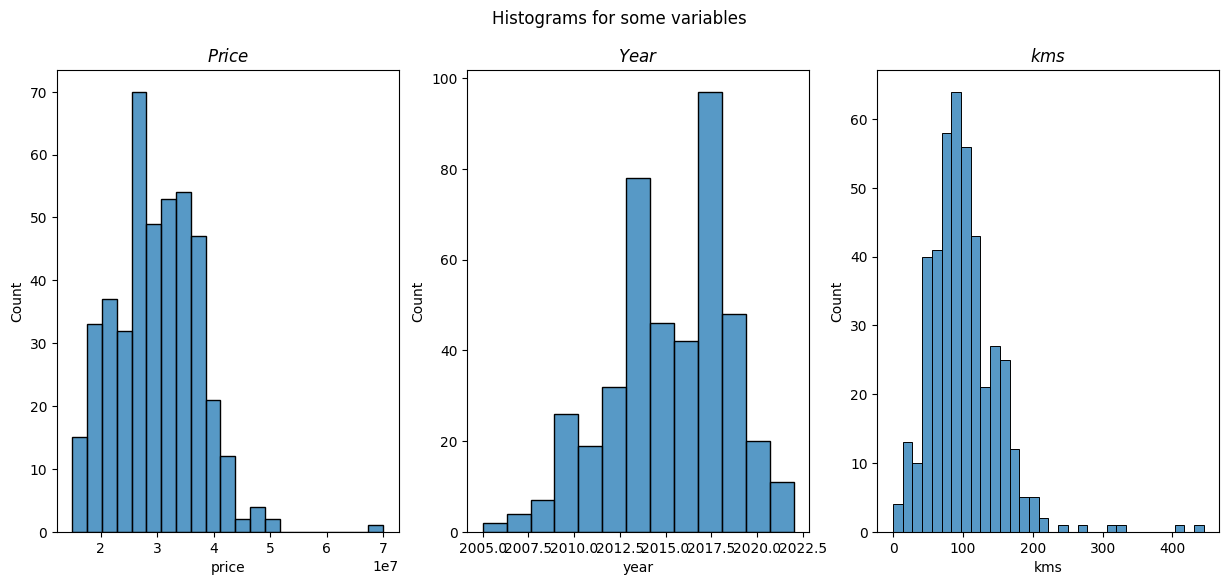

In [22]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')
#Segmentación del mercado basado en histogramas

#### Boxplots

<Axes: >

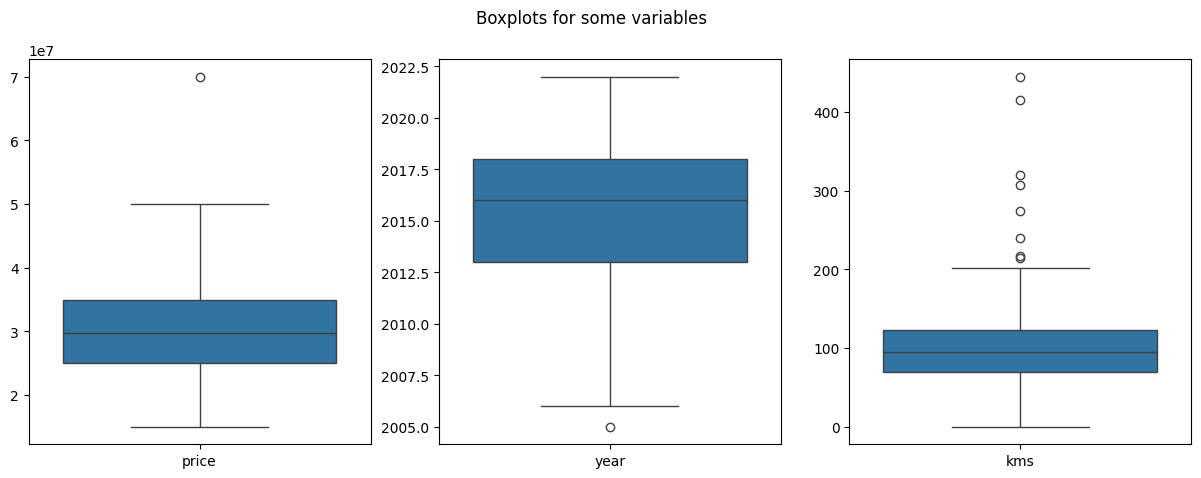

In [23]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)
#Valores atipicos = °

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

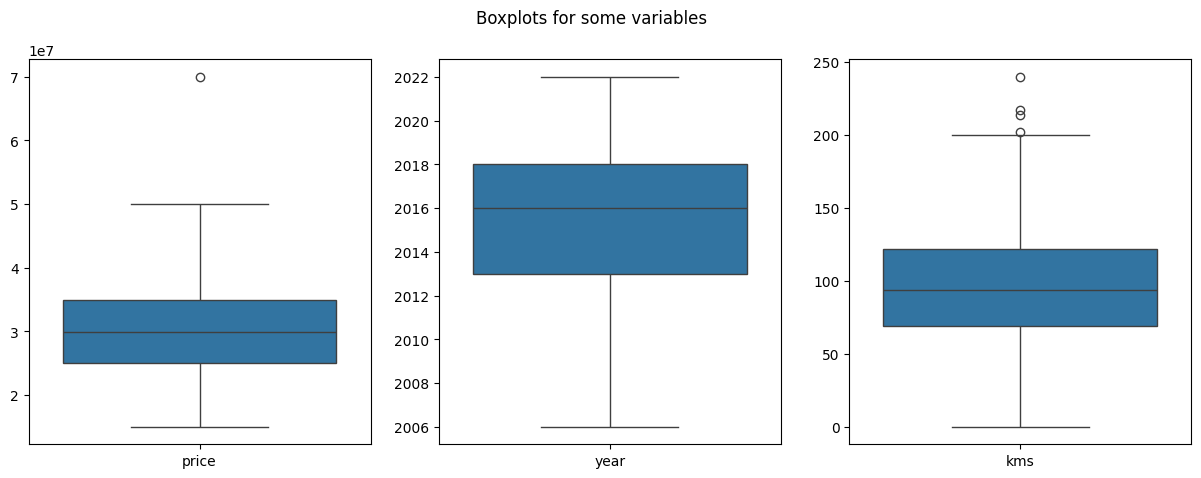

In [24]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>3)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

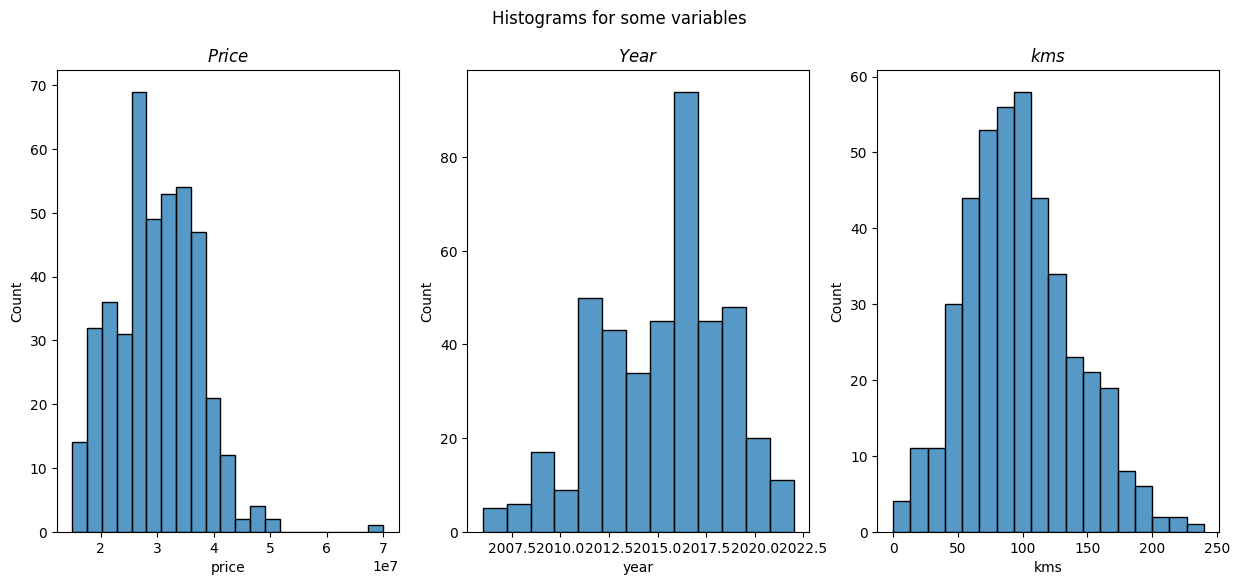

In [25]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

### EDA (Exploratory Data Analysis)

#### Correlations

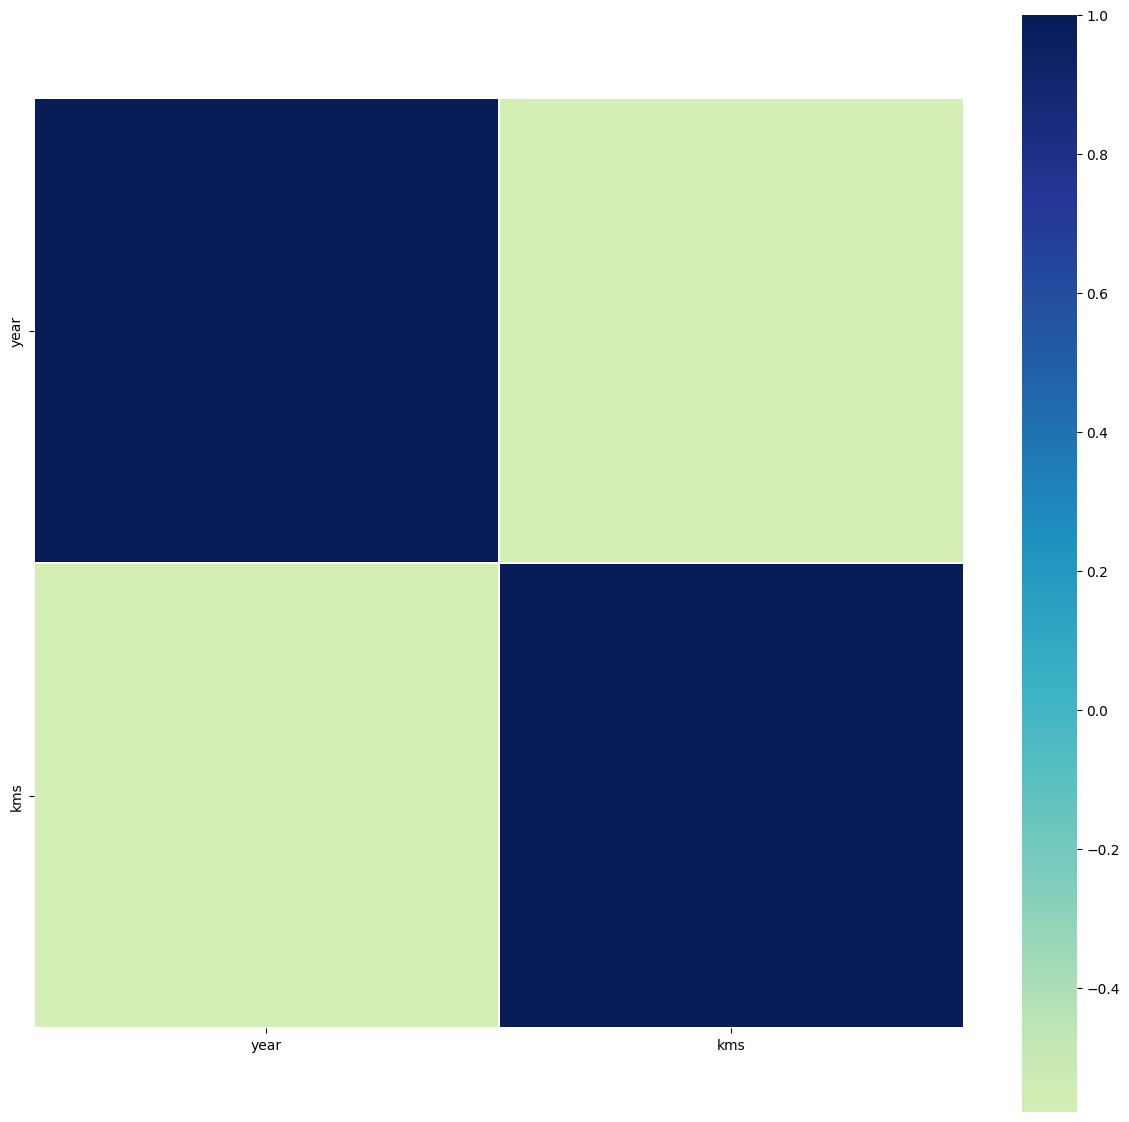

In [29]:
X = datacc
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X[['year', 'kms']])

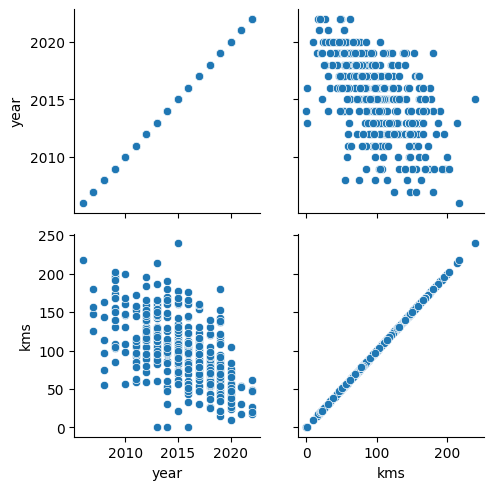

In [30]:
g = sns.PairGrid(X[['year', 'kms']])
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [32]:
#Variables Independientes / dividir variables
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

#Variable a predecir
Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(427, 4)
(427,)


In [33]:
# Data set normalization and partitioning
# Normalización a todas las variables independientes
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(427, 4)

In [34]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20, #porcentaje de evaluación
                                         random_state=42)

### Multivariate lineal regression

La regresión lineal múltiple permite generar un modelo lineal en el que el valor de la variable dependiente o respuesta (Y) se determina a partir de un conjunto de variables independientes llamadas predictores (X1, X2, X3…)

https://cienciadedatos.net/documentos/25_regresion_lineal_multiple

In [35]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [36]:
# accuracy check
# RMSE más cercano a 0 diferencia del valor de la predicción respecto a la realidad / margen de error no percentual
# R2 mas cercano a 1 porcentaje de exactitud
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 3675487.65
MAE: 3023620.71
R2: 0.74


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [37]:
!pip install lightgbm

In [38]:
import lightgbm as lgb

In [39]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [40]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 4148242.23
MAE: 3522189.49
R2: 0.67


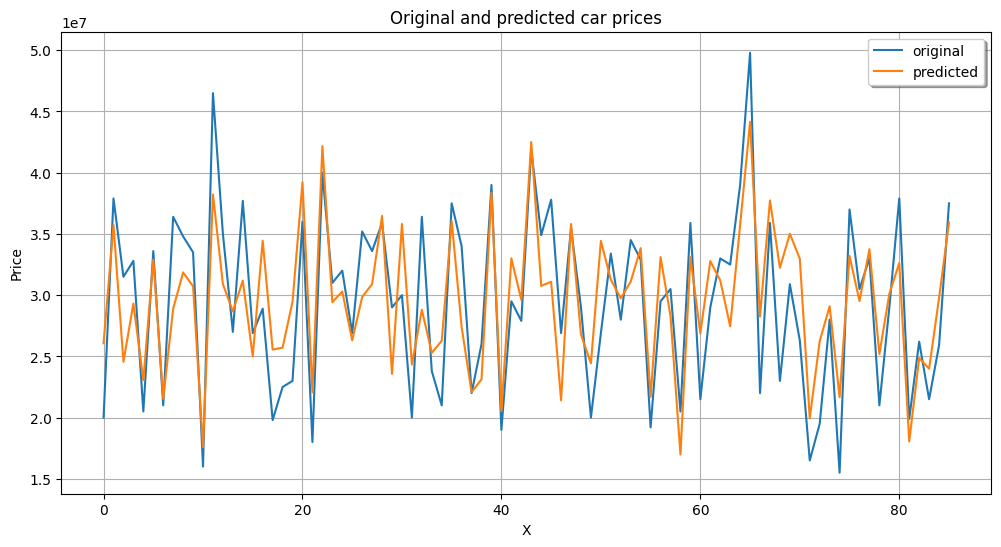

In [41]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

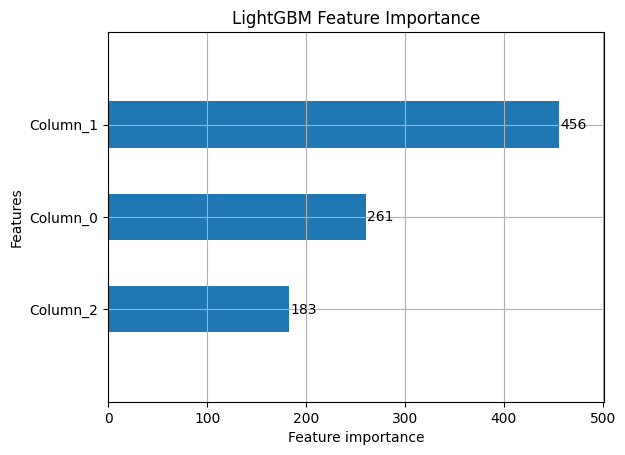

In [42]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

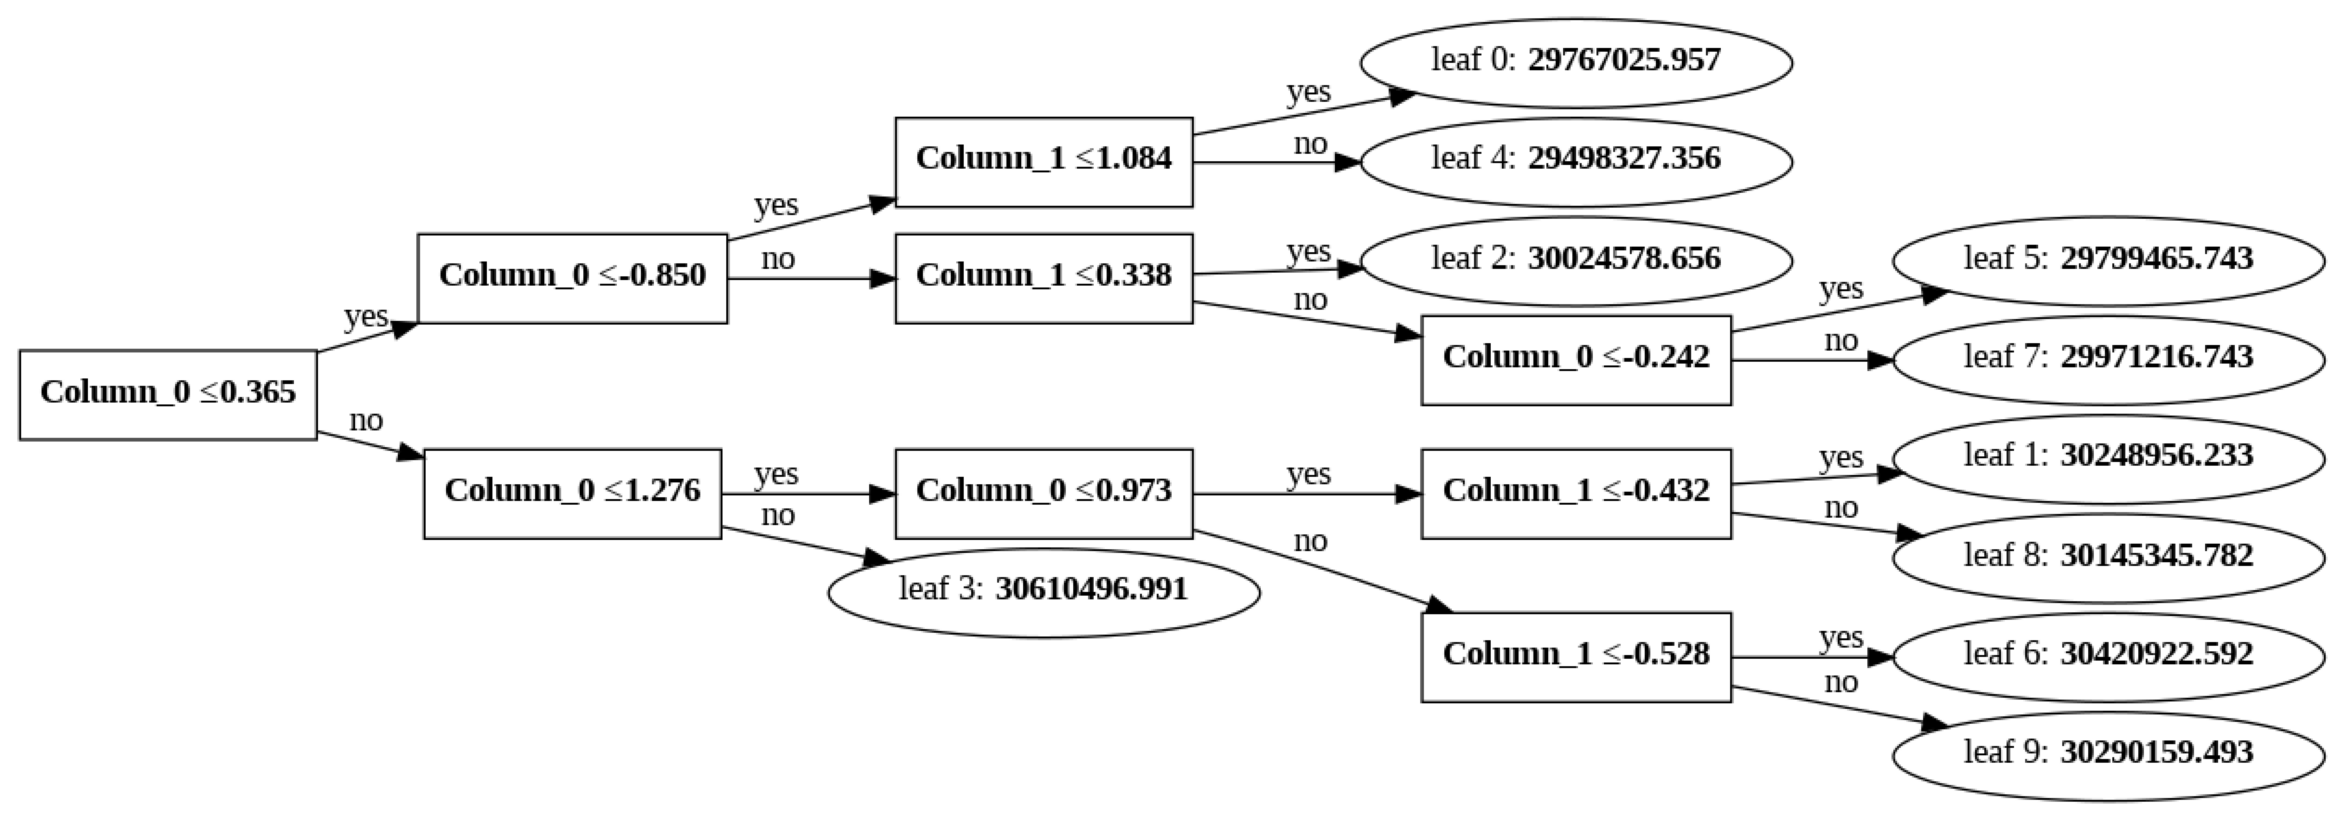

In [43]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [46]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 4326241.74
MAE: 3509740.24
R2: 0.64


**Save the model**

In [47]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [48]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [49]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [50]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [51]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.50


In [52]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.54


In [53]:
# Pred
y_pred4 = model4.predict(X_test)

In [54]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 4674025.50
MAE: 3786829.84
R2: 0.59


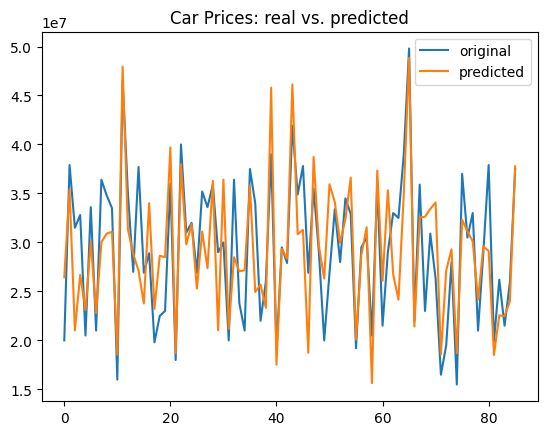

In [55]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()